## XSBench
Compiler: `gcc-7.2.0`  
flags: `-std=gnu99 -march=native -fopenmp -g -pg -O3`  
libs: `-lm`  
run parameters: `-t 1` (Serial Run) 

---
### Serial Run
(Haswell) Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz  
`divsd`: 10-20 Cycles  
`movsd`: 3 cycles  
L1 Cache: 32 kB, 8 way, 64 sets, 64 B line size, **latency 4**, per core.    
L2 Cache: 256 kB, 8 way, 512 sets, 64 B line size, **latency 12**, per core.

---
####  `CalculateXS.c::calculate_micro_xs( ) | Line 41`: 
|  CPUTIME  | Instructions per Cycle | L1 Data Cache Miss Rate | L2 Data Cache Miss Rate |
|:---------:|:----------------------:|:-----------------------:|:-----------------------:|
| 7.7 %     |    **0.25**            | 13.9%                   |     88.0%               | 
```c
|40|	// calculate the re-useable interpolation factor
|41|	f = (high->energy - p_energy) / (high->energy - low->energy); 
```
---
#### `XSutils.c::binary_search( ) | Loop at 59`:

|  CPUTIME  | Instructions per Cycle | L1 Data Cache Miss Rate | L2 Data Cache Miss Rate |
|:---------:|:----------------------:|:-----------------------:|:-----------------------:|
| 78.9%     |    0.96                | **29.4%**               |     87.9%               |  
```c
	// Begins binary search	 // Conditional Branch Misprediction Rate | CPUTIME
|59|	while( max >= min )                       //   .5% | 78.0%
|60|	{
|61|		mid = min + floor( (max-min) / 2.0);  //       | 17.8% 
|62|		if( A[mid].energy < quarry )          //  8.3% | 55.8%
|63|			min = mid+1;
|64|        else if( A[mid].energy > quarry )     //       |  2.3%
|65|			max = mid-1;
|66|		else
|67|			return mid;
|68|    }
```

---

Compiler: `gcc-7.2.0`  
flags: `-std=gnu99 -f openmp-g -pg -O3`  
libs: `-lm`  
run parameters: `-t 1` (Serial Run)  
Haswell

###### XSBench spent 72.6% of its time in loop at XSutils.c:59. 
```c
	// Begins binary search	 // Conditional Branch Misprediction Rate | CPUTIME
|59|	while( max >= min )                       //   .5% | 78.0%
|60|	{
|61|		mid = min + floor( (max-min) / 2.0);  //       | 17.8% 
|62|		if( A[mid].energy < quarry )          //  8.3% | 55.8%
|63|			min = mid+1;
|64|        else if( A[mid].energy > quarry )     //       |  2.3%
|65|			max = mid-1;
|66|		else
|67|			return mid;
        }
```

In [3]:
.103 / 1.24

0.08306451612903225

#### While Loop Instruction Breakdown

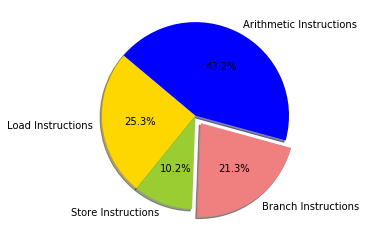

In [5]:
# Old Data

import matplotlib.pyplot as plt

Arith_INS = 5.3 - 1.34 - .543 - 1.13
 
# Data to plot
labels = 'Load Instructions', 'Store Instructions', 'Branch Instructions', 'Arithmetic Instructions'
sizes = [1.34, .543, 1.13, Arith_INS]
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue']
explode = (0, 0, 0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title = "While Loop"
plt.axis('equal')
plt.show()

In [8]:
# Old Data

import pandas as pd

inst_df = pd.DataFrame.from_csv('/Users/brianhomerding/Documents/Profiles/XSBenchINST.csv')
branch_df = pd.DataFrame.from_csv('/Users/brianhomerding/Documents/Profiles/XSBenchBRANCH.csv')

In [9]:
inst_df

,CPUTIME(E),PAPI_TOT_CYCLE(E),PAPI_TOT_INS(E),PAPI_TOT_CYCLE(E).1,PAPI_LD_INS(E),PAPI_TOT_CYCLE(E).2,PAPI_SR_INS(E),PAPI_TOT_CYCLE(E).3,PAPI_BR_INS(E),PAPI_TOT_CYCLE(E).4
Scope,,,,,,,,,,
"""loop at XSutils.c: 59""",2.93e+08 69.2%,6.68e+11 69.6%,5.30e+11 65.8%,5.53e+11 69.2%,1.34e+11 57.4%,1.50e+11 64.0%,5.43e+10 53.5%,6.01e+10 57.8%,1.13e+11 74.3%,1.15e+11 74.8%\\n
"""XSutils.c: 62""",1.98e+08 46.9%,4.64e+11 48.4%,4.23e+11 52.5%,3.85e+11 48.2%,9.81e+10 42.0%,1.04e+11 44.4%,3.84e+10 37.8%,4.19e+10 40.3%,8.51e+10 56.1%,8.01e+10 52.1%\\n
"""XSutils.c: 61""",4.14e+07 9.8%,9.68e+10 10.1%,5.25e+10 6.5%,7.98e+10 10.0%,1.67e+10 7.1%,2.20e+10 9.4%,8.82e+09 8.7%,8.62e+09 8.3%,1.30e+10 8.6%,1.65e+10 10.7%\\n
"""XSutils.c: 64""",2.19e+07 5.2%,4.42e+10 4.6%,2.01e+10 2.5%,3.74e+10 4.7%,6.60e+09 2.8%,1.00e+10 4.3%,1.76e+09 1.7%,4.00e+09 3.8%,5.01e+09 3.\n,NaN
"""loop at XSutils.c: 59""",2.93e+08 69.2%,6.68e+11 69.6%,5.30e+11 65.8%,5.53e+11 69.2%,1.34e+11 57.4%,1.50e+11 64.0%,5.43e+10 53.5%,6.01e+10 57.8%,1.13e+11 74.3%,1.15e+11 74.8%\n
"""XSutils.c: 62""",1.98e+08 46.9%,4.64e+11 48.4%,4.23e+11 52.5%,3.85e+11 48.2%,9.81e+10 42.0%,1.04e+11 44.4%,3.84e+10 37.8%,4.19e+10 40.3%,8.51e+10 56.1%,8.01e+10 52.1%\n
"""XSutils.c: 61""",4.14e+07 9.8%,9.68e+10 10.1%,5.25e+10 6.5%,7.98e+10 10.0%,1.67e+10 7.1%,2.20e+10 9.4%,8.82e+09 8.7%,8.62e+09 8.3%,1.30e+10 8.6%,1.65e+10 10.7%\n
"""XSutils.c: 64""",2.19e+07 5.2%,4.42e+10 4.6%,2.01e+10 2.5%,3.74e+10 4.7%,6.60e+09 2.8%,1.00e+10 4.3%,1.76e+09 1.7%,4.00e+09 3.8%,5.01e+09 3.3%,7.74e+09 5.0%\n
\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
branch_df

,CPUTIME(E),PAPI_TOT_CYCLE(E),PAPI_BR_UNC,PAPI_TOT_CYCLE(E).1,PAPI_BR_CN,PAPI_TOT_CYCLE(E).2,PAPI_BR_MSP,PAPI_TOT_CYCLE(E).3,PAPI_BR_PRC,PAPI_TOT_CYCLE(E).4,PAPI_BR_INS,PAPI_TOT_CYCLE(E).5
Scope,,,,,,,,,,,,
"""loop at XSutils.c: 59""",2.93e+08 69.2%,6.68e+11 69.6%,6.18e+10 75.3%,1.72e+09 55.0%,5.11e+10 73.7%,5.39e+10 74.6%,3.54e+09 78.7%,5.54e+09 72.3%,4.90e+10 75.5%,1.79e+09 56.4%,1.13e+11 74.3%,1.15e+11 74.8%\n
"""XSutils.c: 0""",1.35e+07 3.2%,2.59e+10 2.7%,2.30e+09 2.8%,6.80e+07 2.2%,8.92e+08 1.3%,2.18e+09 3.0%,4.00e+06 0.1%,2.14e+08 2.8%,2.18e+09 3.4%,7.40e+07 2.3%,3.33e+09 2.2%,4.50e+09 2.9%\n
"""XSutils.c: 59""",2.20e+06 0.5%,4.70e+09 0.5%,1.79e+08 0.2%,6.00e+06 0.2%,3.70e+08 0.5%,3.80e+08 0.5%,2.04e+08 4.5%,4.80e+07 0.6%,4.53e+08 0.7%,1.60e+07 0.5%,1.19e+09 0.8%,7.24e+08 0.5%\n
"""XSutils.c: 61""",4.14e+07 9.8%,9.68e+10 10.1%,9.60e+09 11.7%,2.72e+08 8.7%,6.08e+09 8.8%,7.64e+09 10.6%,3.25e+09 72.3%,7.58e+08 9.9%,7.73e+09 11.9%,2.88e+08 9.1%,1.30e+10 8.6%,1.65e+10 10.7%\n
"""XSutils.c: 62""",1.98e+08 46.9%,4.64e+11 48.4%,4.22e+10 51.4%,1.17e+09 37.4%,4.01e+10 57.8%,3.77e+10 52.1%,7.60e+07 1.7%,3.87e+09 50.5%,3.33e+10 51.3%,1.21e+09 38.2%,8.51e+10 56.1%,8.01e+10 52.1%\n
"""XSutils.c: 63""",1.24e+07 2.9%,2.31e+10 2.4%,1.83e+09 2.2%,5.20e+07 1.7%,1.27e+09 1.8%,1.77e+09 2.4%,4.00e+06 0.1%,2.06e+08 2.7%,1.53e+09 2.3%,5.80e+07 1.8%,3.42e+09 2.3%,3.97e+09 2.6%\n
"""XSutils.c: 64""",2.19e+07 5.2%,4.42e+10 4.6%,5.13e+09 6.3%,1.34e+08 4.3%,1.91e+09 2.7%,3.54e+09 4.9%,,3.80e+08 5.0%,3.08e+09 4.7%,1.16e+08 3.6%,5.01e+09 3.3%,7.74e+09 5.0%\n
"""XSutils.c: 65""",3.33e+06 0.8%,9.06e+09 0.9%,5.80e+08 0.7%,1.60e+07 0.5%,4.68e+08 0.7%,7.02e+08 1.0%,,6.40e+07 0.8%,7.51e+08 1.2%,2.80e+07 0.9%,1.64e+09 1.1%,1.53e+09 1.0%\n
\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

---

## XSBench
Compiler: `gcc-7.2.0`  
flags: `-std=gnu99 -march=native -fopenmp -g -pg -O3`  
libs: `-lm`  
run parameters: `-t 1` (Serial Run) 

---
### Serial Run
(Haswell) Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz  
`divsd`: 10-20 Cycles  
`movsd`: 3 cycles  
L1 Cache: 32 kB, 8 way, 64 sets, 64 B line size, **latency 4**, per core.    
L2 Cache: 256 kB, 8 way, 512 sets, 64 B line size, **latency 12**, per core.

---
####  `CalculateXS.c::calculate_micro_xs( ) | Line 41`: 
|  CPUTIME  | Instructions per Cycle | L1 Data Cache Miss Rate | L2 Data Cache Miss Rate |
|:---------:|:----------------------:|:-----------------------:|:-----------------------:|
| 7.7 %     |    **0.25**            | 13.9%                   |     88.0%               | 
```c
|40|	// calculate the re-useable interpolation factor
|41|	f = (high->energy - p_energy) / (high->energy - low->energy); 
```
---
#### `XSutils.c::binary_search( ) | Loop at 59`:

|  CPUTIME  | Instructions per Cycle | L1 Data Cache Miss Rate | L2 Data Cache Miss Rate |
|:---------:|:----------------------:|:-----------------------:|:-----------------------:|
| 78.9%     |    0.96                | **29.4%**               |     87.9%               |  
```c
	// Begins binary search	 // Conditional Branch Misprediction Rate | CPUTIME
|59|	while( max >= min )                       //   .5% | 78.0%
|60|	{
|61|		mid = min + floor( (max-min) / 2.0);  //       | 17.8% 
|62|		if( A[mid].energy < quarry )          //  8.3% | 55.8%
|63|			min = mid+1;
|64|        else if( A[mid].energy > quarry )     //       |  2.3%
|65|			max = mid-1;
|66|		else
|67|			return mid;
|68|    }
```

## XSBench Top Down Analysis 

Compiler: `gcc-7.2.0`  
flags: `-std=gnu99 -f openmp-g -pg -O3`  
libs: `-lm`  
run parameters: `-t 1` (Serial Run)  
Haswell

|Scope|Cycles / Inst|
|:----|:---:|
|`binary_search() : Loop at Line 59` | 1.04 CPI |
|`calculate_micro_xs() : Line 41`| **3.98** CPI|

#### Issue Cycles
`binary_search() : Loop at Line 59`:  
-- 2.04e+11 Full Issue | 27.7% Cycles Issuing Max Instructions  
-- 1.37e+09 No Issue | 0.2% Cycles Issuing No Instructions  
-- 7.37e+11 Total Cycles

`calculate_micro_xs() : Line 41`  
-- 4.77e+08 Full Issue | 0.7% Cycles Issuing Max Instructions  
-- 2.40e+07 No Issue | less than .1% Cycles Issuing No Instructions  
-- 7.24e+10 Total Cycles  
#### Retire Cycles
`binary_search() : Loop at Line 59`:  
-- 1.86e+11 Full Retire | 25.2% Cycles Retiring Max Instructions  
-- 1.91e+11 No Retire | 25.9% Cycles Retiring No Instructions  
-- 7.37e+11 Total Cycles  
  
`calculate_micro_xs() : Line 41`:  
-- 6.79e+09 Full Retire | 9.4% Cycles Retiring Max Instrutions  
-- 8.01e+09 No Retire | 11.1% Cycles Retiring No Instructions  
-- 7.24e+10 Total Cycles  

### Memory
#### Data Cache
`binary_search() : Loop at Line 59`:   
-- 2.00e+10 L1 Data Cache Misses | 29.4% L1 Cache Miss Rate  
-- 1.76e+10 L2 Data Cache Misses | 88.0% L2 Cache Miss Rate    
-- 6.80e+10 Load/Store Instructions  
  
`calculate_micro_xs() : Line 41`:  
-- 1.16e+09 L1 Data Cache Misses | 13.9% L1 Cache Miss Rate  
-- 1.02e+09 L2 Data Cache Misses | 87.9% L2 Cache Miss Rate  
-- 8.36e+09 Load/Store Instructions

In [4]:
1.02 / 1.16

0.8793103448275863

#### binary_search( ) | Loop at Line 59:
```
Throughput Analysis Report
--------------------------
Block Throughput: 30.37 Cycles       Throughput Bottleneck: Backend
Loop Count:  22
Port Binding In Cycles Per Iteration:
--------------------------------------------------------------------------------------------------
|  Port  |   0   -  DV   |   1   |   2   -  D    |   3   -  D    |   4   |   5   |   6   |   7   |
--------------------------------------------------------------------------------------------------
| Cycles |  4.8     0.0  |  4.2  |  0.5     0.5  |  0.5     0.5  |  0.0  |  3.3  |  4.7  |  0.0  |
--------------------------------------------------------------------------------------------------

DV - Divider pipe (on port 0)
D - Data fetch pipe (on ports 2 and 3)
F - Macro Fusion with the previous instruction occurred
* - instruction micro-ops not bound to a port
^ - Micro Fusion occurred
# - ESP Tracking sync uop was issued
@ - SSE instruction followed an AVX256/AVX512 instruction, dozens of cycles penalty is expected
X - instruction not supported, was not accounted in Analysis

| Num Of   |                    Ports pressure in cycles             |      |
|  Uops    |  0  - DV    |  1   |  2  -  D    |  3  -  D  |4|  5   |  6   |7|
-----------------------------------------------------------------------------------------
|   1*     |             |      |             |           | |      |      | | mov edx, eax
|   1*     |             |      |             |           | |      |      | | vxorpd xmm1, xmm1, xmm1
|   1*     |             |      |             |           | |      |      | | vxorpd xmm2, xmm2, xmm2
|   2      |             | 1.0  |             |           | |      |      | | vcvtsi2sd xmm2, xmm2, r8d
|   1      |             |      |             |           | | 0.3  | 0.7  | | sub edx, r8d
|   2      |             | 1.0  |             |           | |      |      | | vcvtsi2sd xmm1, xmm1, edx
|   1      | 0.1         | 0.9  |             |           | |      |      | | vmulsd xmm1, xmm1, xmm3
|   2      | 1.0         | 1.0  |             |           | |      |      | | vroundsd xmm1, xmm1, xmm1, 0x9
|   1      | 0.7         | 0.3  |             |           | |      |      | | vaddsd xmm1, xmm2, xmm1
|   2      | 1.0         |      |             |           | | 1.0  |      | | vcvttsd2si edx, xmm1
|   1      |             |      |             |           | |      | 1.0  | | movsxd rcx, edx
|   1      |             |      |             |           | | 1.0  |      | | lea rcx, ptr [rcx+rcx*2]
|   1      |             |      |             |           | |      | 1.0  | | shl rcx, 0x4
|   1      |             |      | 0.5     0.5 | 0.5   0.5 | |      |      | | vmovsd xmm1, qword ptr [rdi+rcx*1]
|   1      | 1.0         |      |             |           | |      |      | | vucomisd xmm0, xmm1
|   1      |             |      |             |           | |      | 1.0  | | jnbe 0xffffffffffffffb3
|   1      | 1.0         |      |             |           | |      |      | | vucomisd xmm1, xmm0
|   1      |             |      |             |           | |      | 1.0  | | jbe 0x15
|   1      |             |      |             |           | | 1.0  |      | | lea eax, ptr [rdx-0x1]
|   1*     |             |      |             |           | |      |      | | cmp eax, r8d
|   0*F    |             |      |             |           | |      |      | | jnl 0xffffffffffffffae
```

#### calculate_micro_xs( ) | Line 41:
```
Throughput Analysis Report
--------------------------
Block Throughput: 18.00 Cycles       Throughput Bottleneck: Backend
Loop Count:  45
Port Binding In Cycles Per Iteration:
--------------------------------------------------------------------------------------------------
|  Port  |   0   -  DV   |   1   |   2   -  D    |   3   -  D    |   4   |   5   |   6   |   7   |
--------------------------------------------------------------------------------------------------
| Cycles |  1.5     4.0  |  1.5  |  1.0     1.0  |  1.0     1.0  |  0.0  |  0.0  |  0.0  |  0.0  |
--------------------------------------------------------------------------------------------------

| Num Of   |                    Ports pressure in cycles                 |    |
|  Uops    |  0  - DV    |  1   |  2  -  D    |  3  -  D    |  4   |5|6|7|
-----------------------------------------------------------------------------------------
|   1      |             |      | 1.0     1.0 |             |      | | | | vmovsd xmm1, qword ptr [rax+0x30]
|   1      |             | 1.0  |             |             |      | | | | vsubsd xmm0, xmm1, xmm0
|   2^     | 0.5         | 0.5  |             | 1.0     1.0 |      | | | | vsubsd xmm1, xmm1, qword ptr [rax]
|   1      | 1.0     4.0 |      |             |             |      | | | | vdivsd xmm0, xmm0, xmm1
Total Num Of Uops: 5
Analysis Notes:
Backend allocation was stalled due to unavailable allocation resources.
```